In [42]:
import pandas as pd
import re
import nltk
import string
import gensim
import ast
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from itertools import chain, combinations
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Circle, Line
from bokeh.models import HoverTool
from bokeh.palettes import Category20_16
output_notebook()

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced

import matplotlib.pyplot as plt
import matplotlib

import networkx as nx

import numpy as np

import seaborn as sns

import smart_open


def sdg_articles():
    protocol='https'
    bucket='innovation-mapping-tutorials'
    gtr_projects_key='sdg/sdg_web_articles.json'
    address='s3.us-east-2.amazonaws.com'
    list_cols = ['sdg_goals']
    gtr_projects_df = pd.read_json(smart_open.open("{}://{}/{}/{}".format(protocol,address,bucket, gtr_projects_key)),)
    return gtr_projects_df


Loading BokehJS ...

In [63]:
df_2018wos = pd.read_csv("2018_WoS.csv", sep=";", header=None)


df_2018wos

,0,1,2,3
0,405496000001,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Research on the reliability of friction system...,"In this paper, the reliability of a non-linear..."
1,405496000002,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Vector solitons in coupled nonlinear Schroding...,The dynamics of two-component solitons is stud...
2,405496000003,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Analysis of cyclical behavior in time series o...,In this paper we have analyzed scaling propert...
3,405496000004,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Impact of marine reserve on maximum sustainabl...,Multispecies fisheries management requires man...
4,405496000005,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Double-well chimeras in 2D lattice of chaotic ...,We investigate spatio-temporal dynamics of a 2...
...,...,...,...,...
1630345,501568200001,TURKISH JOURNAL OF BIOCHEMISTRY-TURK BIYOKIMYA...,"TBS International Biochemistry Congress 2018, ...",NaN
1630346,502087800001,JOURNAL OF GASTROINTESTINAL AND LIVER DISEASES,The 5th Romanian-German Symposium of Gastroent...,NaN
1630347,502088600001,JOURNAL OF GASTROINTESTINAL AND LIVER DISEASES,The XXXVIIIth National Congress of Gastroenter...,NaN
1630348,502089100001,JOURNAL OF GASTROINTESTINAL AND LIVER DISEASES,The 10th National Symposium on Inflammatory Bo...,NaN


In [3]:

#df1 = pd.read_csv("compiled_keywords_20200723b.csv", sep=",", header=None)
#df1

In [4]:

#df2 = pd.read_csv("scimagojr 2019  Subject Category - Renewable Energy, Sustainability and the Environment.csv", sep=";", header=None)
#df2

In [5]:
df_sdg = sdg_articles()
df_sdg


,index,title,url,text,sdg_goals,source
0,0,A Comprehensive Guide to Solar Energy Systems ...,https://www.sciencedirect.com/science/article/...,This chapter examines the growth of solar phot...,"[8, 11]",RELX
1,1,Sustainable Protein Sources - Chapter 1: Prote...,https://www.sciencedirect.com/science/article/...,"Food is essential for sustenance and, in parti...",[2],RELX
2,2,Advances in Renewable Energies and Power Techn...,https://www.sciencedirect.com/science/article/...,Generation of electric power from renewable en...,[7],RELX
3,3,Advances in Renewable Energies and Power Techn...,https://www.sciencedirect.com/science/article/...,This chapter aims to present an overview of th...,[7],RELX
4,4,Introduction to Petroleum Biotechnology - Chap...,https://www.sciencedirect.com/science/article/...,This chapter deals extensively with the effect...,[7],RELX
...,...,...,...,...,...,...
11615,10722,Event: International Conference on Sustainable...,http://sdg.iisd.org/events/international-confe...,This conference will focus on five themes: soi...,[],IISD
11616,10723,Event: High-Level Policy Dialogue on Implement...,http://sdg.iisd.org/events/high-level-policy-d...,The Economic and Social Commission for Asia an...,[],IISD
11617,10724,Chile Submits Biennial Update Report to UNFCCC,http://sdg.iisd.org/news/chile-submits-biennia...,December 2014: Chile is the first county in th...,[],IISD
11618,10725,Policy Brief: Global Climate Governance in 201...,http://sdg.iisd.org/commentary/policy-briefs/g...,As the 20th session of the Conference of the P...,[],IISD


In [6]:
df_sdg.shape

(11620, 6)

In [7]:
len(df_sdg)

11620

In [8]:
d_sdg_index = list(df_sdg.columns).index('sdg_goals')
d_sdg_index

4

In [9]:
df_sdg.iloc[0,d_sdg_index]

[8, 11]

In [10]:
sdg_definitions = {
     1: '1. No Poverty',
     2: '2. Zero Hunger',
     3: '3. Good Health & Well-being',
     4: '4. Quality Education',
     5: '5. Gender Equality',
     6: '6. Clean Water & Sanitation',
     7: '7. Affordable & Clean Energy',
     8: '8. Decent Work & Economic Growth',
     9: '9. Industry, Innovation & Infrastructure',
     10: '10.  Reduced Inequalities',
     11: '11.  Sustainable Cities & Communities',
     12: '12.  Responsible Consumption & Production',
     13: '13.  Climate Action',
     14: '14.  Life Below Water',
     15: '15.  Life on Land',
     16: '16.  Peace, Justice & Strong Institutions',
     17: '17.  Partnerships for the Goals'
}
sdg_names = list(sdg_definitions.values())
sdg_names

['1. No Poverty',
 '2. Zero Hunger',
 '3. Good Health & Well-being',
 '4. Quality Education',
 '5. Gender Equality',
 '6. Clean Water & Sanitation',
 '7. Affordable & Clean Energy',
 '8. Decent Work & Economic Growth',
 '9. Industry, Innovation & Infrastructure',
 '10.  Reduced Inequalities',
 '11.  Sustainable Cities & Communities',
 '12.  Responsible Consumption & Production',
 '13.  Climate Action',
 '14.  Life Below Water',
 '15.  Life on Land',
 '16.  Peace, Justice & Strong Institutions',
 '17.  Partnerships for the Goals']

In [86]:

stop_words = set(stopwords.words('english') +list(string.punctuation)+ ['\\n'] + ['quot'])

regex_str = ["http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|"
             "[!*\(\),](?:%[0-9a-f][0-9a-f]))+",
             "(?:\w+-\w+){2}",
             "(?:\w+-\w+)",
             "(?:\\\+n+)",
             "(?:@[\w_]+)",
             "<[^>]+>",
             "(?:\w+'\w)",
             "(?:[\w_]+)",
             "(?:\S)"]

# Create the tokenizer which will be case insensitive and will ignore space.
tokens_re = re.compile(r'('+'|'.join(regex_str)+')',re.VERBOSE | re.IGNORECASE)


def tokenize_document(text):
    return [clean_and_tokenize(sentence)
            for sentence in nltk.sent_tokenize(text)]


def clean_and_tokenize(text):
    tokens = tokens_re.findall(text)
    _tokens = [t.lower() for t in tokens]
    filtered_tokens = [token.replace('-', '_') for token in _tokens
                       if len(token) > 2
                       and token not in stop_words
                       and not any(x in token for x in string.digits)
                       and any(x in token for x in string.ascii_lowercase)]
    return filtered_tokens


def build_ngrams(documents, n=2, **kwargs):
    if "level" not in kwargs:
        level = 2
    else:
        level = kwargs["level"]
    # Generate sentences, as required for gensim Phrases
    # sentences = []
    # for doc in documents:
    #     sentences += doc
    # Get the bigrams
    phrases = gensim.models.Phrases(documents,  min_count=2, threshold=1,
                                    delimiter=b'_')
    bigram = gensim.models.phrases.Phraser(phrases)
    docs_bi = [bigram[doc] for doc in documents]
    # If finished
    if level == n:
        return docs_bi
    # Otherwise, keep processing until n-grams satisfied
    return build_ngrams(docs_bi, n=n, level=level+1)

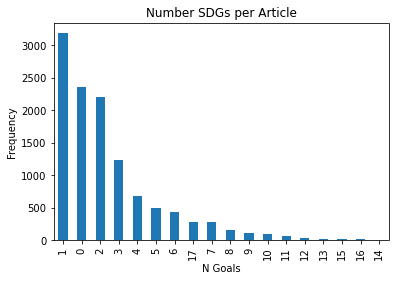

In [12]:
df_sdg['n_goals'] = [len(x) for x in df_sdg['sdg_goals']]

fig, ax = plt.subplots()
df_sdg['n_goals'].value_counts().plot.bar(ax=ax)
ax.set_title('Number SDGs per Article')
ax.set_xlabel('N Goals')
ax.set_ylabel('Frequency');

In [13]:
df_sdg = df_sdg[(df_sdg['n_goals'] > 0) & (df_sdg['n_goals'] < 4)]

In [14]:
sdg_counts = pd.Series(chain(*df_sdg['sdg_goals'])).map(sdg_definitions).value_counts()

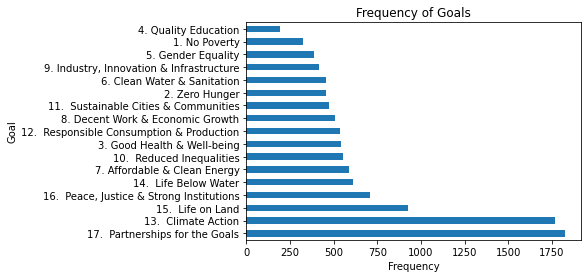

In [15]:


fig, ax = plt.subplots()
sdg_counts.plot.barh(ax=ax)
ax.set_title('Frequency of Goals')
ax.set_xlabel('Frequency')
ax.set_ylabel('Goal');

In [16]:
df_sdg['n_goals'] = [len(x) for x in df_sdg['sdg_goals']]

df_sdg = df_sdg[(df_sdg['n_goals'] > 0) & (df_sdg['n_goals'] < 4)]
sdg_counts = pd.Series(chain(*df_sdg['sdg_goals'])).map(sdg_definitions).value_counts()

df_sdg = df_sdg[[False if 17 in x else True for x in df_sdg['sdg_goals']]]

sdg_counts = pd.Series(chain(*df_sdg['sdg_goals'])).map(sdg_definitions).value_counts()

df_sdg = df_sdg[df_sdg['text'].str.len() > 140]
df_sdg = df_sdg.drop_duplicates('text')
df_sdg = df_sdg.drop('index', axis=1)
df_sdg = df_sdg.reset_index()
df_sdg.shape

c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(4640, 7)

# Text Preprocessing

## Tokenisation

In [17]:
tokenized = [list(chain(*tokenize_document(document))) for document in df_sdg['text'].values]

In [18]:
doc_id = 0
n_tokens_print = 10

print('Original text of first document:')
print(df_sdg['text'].values[0], '\n')

print(f'First {n_tokens_print} tokens in first document {doc_id}:')
print(tokenized[doc_id][:n_tokens_print])

Original text of first document:
This chapter examines the growth of solar photovoltaic (PV) power across regions and countries, from the early 2000s until the current period. It will identify the countries where the initial solar PV development began and the countries where development is currently growing. The chapter will also assess the likely future path of solar PV in the coming years and offer some predictions as to how and where future growth will take place. This will entail an analysis of the drivers of deployment in the past, present, and future. Finally, the chapter will examine the breakdown of the types of deployment by segment, offering views on their future development. 

First 10 tokens in first document 0:
['chapter', 'examines', 'growth', 'solar', 'photovoltaic', 'power', 'across', 'regions', 'countries', 'early']


## Lemmatization

In [19]:
wnl = WordNetLemmatizer()
lemmatized = [[wnl.lemmatize(t) for t in b] for b in tokenized]

In [20]:
doc_id = 0
n_tokens_print = 10

print(f'First {n_tokens_print} tokens in first document {doc_id}:')
print(tokenized[doc_id][:n_tokens_print], '\n')

print(f'First {n_tokens_print} lemmas in first document {doc_id}:')
print(lemmatized[doc_id][:n_tokens_print])

First 10 tokens in first document 0:
['chapter', 'examines', 'growth', 'solar', 'photovoltaic', 'power', 'across', 'regions', 'countries', 'early'] 

First 10 lemmas in first document 0:
['chapter', 'examines', 'growth', 'solar', 'photovoltaic', 'power', 'across', 'region', 'country', 'early']


## Term Frequencies

In [21]:
lemma_counts = Counter(chain(*lemmatized))
lemma_counts.most_common(50)

[('development', 8692),
 ('climate', 7137),
 ('country', 6517),
 ('sustainable', 6453),
 ('report', 5649),
 ('global', 5527),
 ('energy', 5103),
 ('change', 4788),
 ('also', 4536),
 ('international', 4311),
 ('action', 4056),
 ('world', 3977),
 ('water', 3960),
 ('sdg', 3568),
 ('meeting', 3452),
 ('policy', 3240),
 ('including', 3191),
 ('support', 3125),
 ('implementation', 2963),
 ('national', 2827),
 ('new', 2826),
 ('conference', 2824),
 ('government', 2819),
 ('agreement', 2748),
 ('goal', 2698),
 ('sdgs', 2675),
 ('state', 2629),
 ('agenda', 2613),
 ('organization', 2582),
 ('target', 2560),
 ('need', 2414),
 ('food', 2332),
 ('health', 2332),
 ('people', 2265),
 ('system', 2198),
 ('environment', 2162),
 ('session', 2133),
 ('programme', 2128),
 ('work', 2119),
 ('management', 2118),
 ('party', 2118),
 ('event', 2102),
 ('economic', 2072),
 ('group', 2072),
 ('ocean', 2067),
 ('land', 2061),
 ('sector', 2055),
 ('resource', 2040),
 ('process', 1980),
 ('paris', 1973)]

In [22]:
removes = ['development', 'country', 'report', 'also', 'action', 'sdg', 'meeting', 'policy', 'including', 'support',
          'implementation', 'national', 'new', 'conference', 'government', 'agreement', 'sdgs', 'goal', 'state',
          'agenda', 'organization', 'target', 'need', 'system', 'session', 'programme', 'management', 'party',
          'event', 'sector', 'process']
removes

['development',
 'country',
 'report',
 'also',
 'action',
 'sdg',
 'meeting',
 'policy',
 'including',
 'support',
 'implementation',
 'national',
 'new',
 'conference',
 'government',
 'agreement',
 'sdgs',
 'goal',
 'state',
 'agenda',
 'organization',
 'target',
 'need',
 'system',
 'session',
 'programme',
 'management',
 'party',
 'event',
 'sector',
 'process']

In [23]:
min_frequency = 5

df_sdg['clean_texts'] = [' '.join([t for t in doc if (t not in removes) & (lemma_counts[t] >= min_frequency)]) 
                     for doc in lemmatized] 


In [24]:
doc_id = 0

n_tokens_print = 10

print('Original text of first document:')
print(df_sdg['text'].values[0], '\n')

print(df_sdg['clean_texts'][doc_id])

Original text of first document:
This chapter examines the growth of solar photovoltaic (PV) power across regions and countries, from the early 2000s until the current period. It will identify the countries where the initial solar PV development began and the countries where development is currently growing. The chapter will also assess the likely future path of solar PV in the coming years and offer some predictions as to how and where future growth will take place. This will entail an analysis of the drivers of deployment in the past, present, and future. Finally, the chapter will examine the breakdown of the types of deployment by segment, offering views on their future development. 

chapter examines growth solar photovoltaic power across region early current period identify initial solar began currently growing chapter ass likely future path solar coming year offer prediction future growth take place entail analysis driver deployment past present future finally chapter examine bre

## Natural Language analysis and information extraction

### Words Bag

In [25]:
count_vectorizer = CountVectorizer()
bow_vecs = count_vectorizer.fit_transform(df_sdg['clean_texts'])

In [26]:
vocab = np.array(count_vectorizer.get_feature_names())

In [27]:
doc_id = 0
n_top_terms = 30

def get_vec_counts(bow, idx):
    return np.array(bow.todense()[idx])[0]

def get_top_terms(bow, doc_id):
    vec_counts = get_vec_counts(bow, doc_id)
    topn = np.argsort(vec_counts)[::-1][:n_top_terms]
    top_counts = vec_counts[topn]
    top_terms = vocab[topn]
    return top_terms, top_counts

top_terms, top_counts = get_top_terms(bow_vecs, doc_id)

for term, count in zip(top_terms, top_counts):
    print(count, term)

4 future
3 solar
3 chapter
2 growth
2 deployment
1 view
1 ass
1 path
1 growing
1 currently
1 current
1 year
1 examines
1 began
1 power
1 offer
1 offering
1 photovoltaic
1 period
1 present
1 take
1 segment
1 identify
1 coming
1 breakdown
1 analysis
1 region
1 place
1 past
1 prediction


### Tf-idf

In [28]:
tfidf = TfidfTransformer()
tfidf_vecs = tfidf.fit_transform(bow_vecs)

In [29]:
top_terms, top_counts = get_top_terms(tfidf_vecs, doc_id)

print('Score Term')
for term, count in zip(top_terms, top_counts):
    print(f'{count:.3f}', term)

Score Term
0.399 chapter
0.363 solar
0.310 future
0.275 deployment
0.194 breakdown
0.188 entail
0.179 prediction
0.175 growth
0.159 photovoltaic
0.157 offering
0.140 began
0.140 examine
0.138 coming
0.137 path
0.134 examines
0.131 finally
0.130 segment
0.128 initial
0.122 likely
0.119 type
0.117 driver
0.113 offer
0.110 period
0.110 past
0.108 growing
0.107 early
0.106 power
0.105 currently
0.104 ass
0.098 view


In [31]:
svd = TruncatedSVD(n_components=30)
svd_vecs = svd.fit_transform(tfidf_vecs)

In [32]:
tsne = TSNE(n_components=2)
tsne_vecs = tsne.fit_transform(svd_vecs)

In [33]:
single_goals = (df_sdg['n_goals'] == 1).index.values

In [34]:
tsne_vecs_single = tsne_vecs[single_goals]
goal_labels_single = [g[0] for g in df_sdg['sdg_goals'][single_goals]]
titles_single = df_sdg['title'][single_goals].values

In [35]:
from bokeh.models import HoverTool
from bokeh.models import sources
from bokeh.palettes import Category20_16
from bokeh.plotting import figure
from bokeh.io.showing import show


In [36]:

colors = [Category20_16[g-1] for g in goal_labels_single]

cds = ColumnDataSource(data={
    'tsne_0': tsne_vecs[:, 0],
    'tsne_1': tsne_vecs[:, 1],
    'color': colors,
    'goal': [sdg_definitions[g] for g in goal_labels_single],
    'title': titles_single
})

p = figure(width=900, title='TSNE Plot of Single SDG Article Vectors')

hover = HoverTool(tooltips=[('Goal', '@goal'), ('Title', '@title')])

p.circle(source=cds, x='tsne_0', y='tsne_1', color='color', line_width=0, legend_field='goal', radius=0.4, alpha=0.9)
p.add_tools(hover)

show(p)
# output_notebook()

In [37]:
sdg_classes = list(range(1, 17))
mlb = MultiLabelBinarizer(classes=sdg_classes)

In [38]:
sdg_goals_mlb = pd.DataFrame(mlb.fit_transform(df_sdg['sdg_goals']), columns=mlb.classes_)
sdg_goals_mlb

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4636,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4637,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4638,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
sdg_goals_mlb.sum()

1      205
2      413
3      452
4      150
5      327
6      389
7      521
8      366
9      258
10     455
11     391
12     434
13    1443
14     527
15     829
16     531
dtype: int64

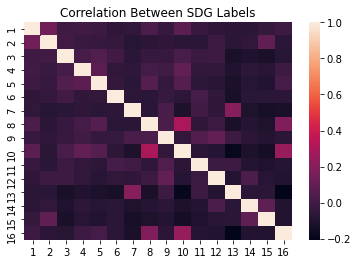

In [40]:
fig, ax = plt.subplots()
sns.heatmap(sdg_goals_mlb.corr(),ax=ax)
ax.set_title('Correlation Between SDG Labels');

In [43]:
tfidf_vecs_train, tfidf_vecs_test, sdg_labels_train, sdg_labels_test = train_test_split(tfidf_vecs, sdg_goals_mlb, test_size=0.2)

print('Training set length:', tfidf_vecs_train.shape[0])
print('Test set length:', tfidf_vecs_test.shape[0])

Training set length: 3712
Test set length: 928


In [44]:
np.logspace(-1, 2, 10)

array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ])

In [45]:
knc = KNeighborsClassifier()
knc.fit(tfidf_vecs_train, sdg_labels_train)

KNeighborsClassifier()

In [51]:
print(tfidf_vecs_train[1])

  (0, 8309)	0.11849785070317823
  (0, 8245)	0.13070228728348177
  (0, 8210)	0.12292821895889187
  (0, 8129)	0.1666172680865092
  (0, 8116)	0.2050099036761043
  (0, 7842)	0.09735589255736446
  (0, 7765)	0.14994629560313472
  (0, 7692)	0.05545991779702076
  (0, 7691)	0.11304047407722997
  (0, 7644)	0.23338213692330706
  (0, 7293)	0.09401842098484428
  (0, 7112)	0.153225199587057
  (0, 6264)	0.0851484940184701
  (0, 6152)	0.10011946260440462
  (0, 5227)	0.15853816376723984
  (0, 5189)	0.22428369144354324
  (0, 5054)	0.11669106846165353
  (0, 4892)	0.1782546450399818
  (0, 4685)	0.19682980360809743
  (0, 4669)	0.24228985995751665
  (0, 4407)	0.13693981350447268
  (0, 4126)	0.11627469908356632
  (0, 4079)	0.11644063427277233
  (0, 3832)	0.2085851735488569
  (0, 3771)	0.09201683769370735
  (0, 3685)	0.09279507324241336
  (0, 3423)	0.058096869493517285
  (0, 3207)	0.14237421405691608
  (0, 3190)	0.09058950996786871
  (0, 3148)	0.1252190914920155
  (0, 3090)	0.08347082225646878
  (0, 2677)	0.1

In [53]:
print(tfidf_vecs[1])

  (0, 8371)	0.08367608159943152
  (0, 8368)	0.05288790123203695
  (0, 8103)	0.040245213193409936
  (0, 8041)	0.051415615319435094
  (0, 7944)	0.05403946386120236
  (0, 7878)	0.04180570190692695
  (0, 7692)	0.02366397182421323
  (0, 7389)	0.08483502207660139
  (0, 7337)	0.08873497260106221
  (0, 7330)	0.0736399852761598
  (0, 7289)	0.038228834044600625
  (0, 7154)	0.06279176808473987
  (0, 7138)	0.08192950578020795
  (0, 6977)	0.0457868702488746
  (0, 6833)	0.07639338825639014
  (0, 6727)	0.05895927760540208
  (0, 6712)	0.03499793267514369
  (0, 6341)	0.10200169842675141
  (0, 6264)	0.03633167237466598
  (0, 6255)	0.7411133331021991
  (0, 6210)	0.1488044305657024
  (0, 6181)	0.04645268991730155
  (0, 6179)	0.07205888584543226
  (0, 6177)	0.061693706574885765
  (0, 5991)	0.09365309701734843
  :	:
  (0, 2729)	0.05620763126289884
  (0, 2726)	0.05370768769273804
  (0, 2437)	0.04489314395024014
  (0, 2433)	0.03282678241119236
  (0, 2231)	0.040563035442381164
  (0, 2227)	0.04172355118217517
 

In [55]:
preds = knc.predict(tfidf_vecs_test)
preds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
print(classification_report(sdg_labels_test, preds, target_names=sdg_names[:-1]))

                                           precision    recall  f1-score   support

                            1. No Poverty       0.78      0.14      0.24        50
                           2. Zero Hunger       0.82      0.54      0.65        84
              3. Good Health & Well-being       0.90      0.55      0.68       100
                     4. Quality Education       0.85      0.53      0.65        32
                       5. Gender Equality       0.76      0.46      0.57        63
              6. Clean Water & Sanitation       0.96      0.78      0.86        69
             7. Affordable & Clean Energy       0.80      0.71      0.75       110
         8. Decent Work & Economic Growth       0.74      0.44      0.55        77
 9. Industry, Innovation & Infrastructure       0.84      0.28      0.42        58
                10.  Reduced Inequalities       0.68      0.53      0.60        90
    11.  Sustainable Cities & Communities       0.81      0.43      0.56        68
12.

In [59]:
pipe = make_pipeline_imb(RandomUnderSampler(),LogisticRegression(solver='lbfgs', fit_intercept=False))

C = np.logspace(-1, 2, 10)
strats = [0.5, 0.6, 0.7, 0.8]

params = {'randomundersampler__sampling_strategy': strats,'logisticregression__C': C,}

grid = GridSearchCV(pipe, param_grid=params, cv=KFold(n_splits=3, shuffle=True))

In [61]:
tfidfv = TfidfVectorizer(ngram_range=(1,2))
tfidf_vecs = tfidfv.fit_transform(df_sdg['clean_texts'])

svdv = TruncatedSVD(n_components=300)
svd_vecs = svdv.fit_transform(tfidf_vecs)

svd_vecs_train, svd_vecs_test, sdg_labels_train, sdg_labels_test = train_test_split(svd_vecs, sdg_goals_mlb, test_size=0.2)

In [62]:
classifiers = {}
preds = {}

for i in range(1, 17):
    print(sdg_definitions[i])
    grid.fit(svd_vecs_train, sdg_labels_train[i])
    best = grid.best_estimator_
    classifiers[i] = best
    preds[i] = best.predict(svd_vecs_test)
    print(classification_report_imbalanced(sdg_labels_test[i], preds[i]))
    print('\n')

1. No Poverty
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.99      0.29      0.98      0.54      0.31       887
          1       0.57      0.29      0.99      0.39      0.54      0.27        41

avg / total       0.95      0.96      0.32      0.95      0.54      0.31       928



2. Zero Hunger
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.97      0.67      0.97      0.81      0.67       849
          1       0.69      0.67      0.97      0.68      0.81      0.63        79

avg / total       0.95      0.95      0.70      0.95      0.81      0.67       928



3. Good Health & Well-being
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.98      0.76      0.98      0.86      0.76       836
          1       0.80      0.76      0.98      0.78      0.86      0.73        92

avg / total       

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [65]:
df_2018wos.head()

,0,1,2,3
0,405496000001,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Research on the reliability of friction system...,"In this paper, the reliability of a non-linear..."
1,405496000002,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Vector solitons in coupled nonlinear Schroding...,The dynamics of two-component solitons is stud...
2,405496000003,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Analysis of cyclical behavior in time series o...,In this paper we have analyzed scaling propert...
3,405496000004,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Impact of marine reserve on maximum sustainabl...,Multispecies fisheries management requires man...
4,405496000005,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Double-well chimeras in 2D lattice of chaotic ...,We investigate spatio-temporal dynamics of a 2...


In [66]:
df_2018wos.shape

(1630350, 4)

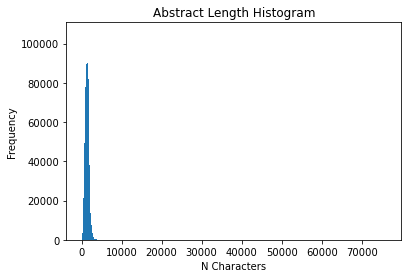

In [74]:
fig, ax = plt.subplots()
ax.hist(df_2018wos[3].str.len(),bins=1000)
ax.set_title('Abstract Length Histogram')
ax.set_xlabel('N Characters')
ax.set_ylabel('Frequency');

In [76]:
max(df_2018wos[3].str.len())

76072.0

In [85]:
df_2018wos[3]

0          In this paper, the reliability of a non-linear...
1          The dynamics of two-component solitons is stud...
2          In this paper we have analyzed scaling propert...
3          Multispecies fisheries management requires man...
4          We investigate spatio-temporal dynamics of a 2...
                                 ...                        
1630345                                                  NaN
1630346                                                  NaN
1630347                                                  NaN
1630348                                                  NaN
1630349    Two series of zinc tetraarylporphyrins contain...
Name: 3, Length: 1630350, dtype: object

In [77]:
min(df_2018wos[3].str.len())

1.0

In [92]:
df_2018wos[3].values

array(['In this paper, the reliability of a non-linearly damped friction oscillator under combined additive and multiplicative Gaussian white noise excitations is investigated. The stochastic averaging method, which is usually applied to the research of smooth system, has been extended to the study of the reliability of non-smooth friction system. The results indicate that the reliability of friction system can be improved by Coulomb friction and reduced by random excitations. In particular, the effect of the external random excitation on the reliability is larger than the effect of the parametric random excitation. The validity of the analytical results is verified by the numerical results. (C) 2017 Elsevier B.V. All rights reserved.',
       "The dynamics of two-component solitons is studied, analytically and numerically, in the framework of a system of coupled extended nonlinear Schrdinger equations, which in-corporate the cross-phase modulation, pseudo-stimulated-Raman-scattering (

In [111]:
"""count=0
for i in range(len(pd.isnull(df_2018wos[3]))):
    if pd.isnull(df_2018wos[3][i])==True:
        count+=1
        df_2018wos.iloc[i,3]=df_2018wos[2][i]
print(count)
        """

34492


In [112]:
count=0
for i in range(len(pd.isnull(df_2018wos[3]))):
    if pd.isnull(df_2018wos[3][i])==True:
        count+=1
        
print(count)
        

0


In [114]:
#df_2018wos.to_csv('Filled_2018_WoS.csv',header=False,index=False)

In [116]:
Filled_df_2018wos = pd.read_csv("Filled_2018_WoS.csv", header=None)

In [117]:
Filled_df_2018wos

,0,1,2,3
0,405496000001,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Research on the reliability of friction system...,"In this paper, the reliability of a non-linear..."
1,405496000002,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Vector solitons in coupled nonlinear Schroding...,The dynamics of two-component solitons is stud...
2,405496000003,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Analysis of cyclical behavior in time series o...,In this paper we have analyzed scaling propert...
3,405496000004,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Impact of marine reserve on maximum sustainabl...,Multispecies fisheries management requires man...
4,405496000005,COMMUNICATIONS IN NONLINEAR SCIENCE AND NUMERI...,Double-well chimeras in 2D lattice of chaotic ...,We investigate spatio-temporal dynamics of a 2...
...,...,...,...,...
1630345,501568200001,TURKISH JOURNAL OF BIOCHEMISTRY-TURK BIYOKIMYA...,"TBS International Biochemistry Congress 2018, ...","TBS International Biochemistry Congress 2018, ..."
1630346,502087800001,JOURNAL OF GASTROINTESTINAL AND LIVER DISEASES,The 5th Romanian-German Symposium of Gastroent...,The 5th Romanian-German Symposium of Gastroent...
1630347,502088600001,JOURNAL OF GASTROINTESTINAL AND LIVER DISEASES,The XXXVIIIth National Congress of Gastroenter...,The XXXVIIIth National Congress of Gastroenter...
1630348,502089100001,JOURNAL OF GASTROINTESTINAL AND LIVER DISEASES,The 10th National Symposium on Inflammatory Bo...,The 10th National Symposium on Inflammatory Bo...


In [100]:
pd.isnull(df_2018wos[3])

0          False
1          False
2          False
3          False
4          False
           ...  
1630345     True
1630346     True
1630347     True
1630348     True
1630349    False
Name: 3, Length: 1630350, dtype: bool

In [107]:
df_2018wos[3][0]

'In this paper, the reliability of a non-linearly damped friction oscillator under combined additive and multiplicative Gaussian white noise excitations is investigated. The stochastic averaging method, which is usually applied to the research of smooth system, has been extended to the study of the reliability of non-smooth friction system. The results indicate that the reliability of friction system can be improved by Coulomb friction and reduced by random excitations. In particular, the effect of the external random excitation on the reliability is larger than the effect of the parametric random excitation. The validity of the analytical results is verified by the numerical results. (C) 2017 Elsevier B.V. All rights reserved.'

In [110]:
df_2018wos.iloc[0,3]

'In this paper, the reliability of a non-linearly damped friction oscillator under combined additive and multiplicative Gaussian white noise excitations is investigated. The stochastic averaging method, which is usually applied to the research of smooth system, has been extended to the study of the reliability of non-smooth friction system. The results indicate that the reliability of friction system can be improved by Coulomb friction and reduced by random excitations. In particular, the effect of the external random excitation on the reliability is larger than the effect of the parametric random excitation. The validity of the analytical results is verified by the numerical results. (C) 2017 Elsevier B.V. All rights reserved.'

In [119]:

tokenized_df_2018wos = [list(chain(*tokenize_document(document))) for document in df_2018wos[3].values]

lemmatized_df_2018wos = [[wnl.lemmatize(t) for t in b] for b in tokenized_df_2018wos]
df_2018wos[3] = [' '.join(t) for t in lemmatized_df_2018wos]

In [121]:
tfidf_gtr = tfidfv.transform(df_2018wos[3])
svd_gtr = svdv.transform(tfidf_gtr)
sdgs_gtr = {}
for i, clf in classifiers.items():
    sdgs_gtr[i] = clf.predict(svd_gtr)

In [122]:
df_gtr_sdgs = pd.DataFrame(sdgs_gtr)
df_gtr_sdgs.columns = [sdg_definitions[i] for i in df_gtr_sdgs.columns]
df_gtr_sdgs.sum(axis=0)

1. No Poverty                                  5786
2. Zero Hunger                                39498
3. Good Health & Well-being                  329667
4. Quality Education                          50082
5. Gender Equality                            40262
6. Clean Water & Sanitation                   73872
7. Affordable & Clean Energy                 133752
8. Decent Work & Economic Growth              10252
9. Industry, Innovation & Infrastructure      53986
10.  Reduced Inequalities                     21647
11.  Sustainable Cities & Communities         22691
12.  Responsible Consumption & Production    243214
13.  Climate Action                           64979
14.  Life Below Water                         26343
15.  Life on Land                             60986
16.  Peace, Justice & Strong Institutions     22356
dtype: int64

In [144]:
df_gtr_sdgs

,1. No Poverty,2. Zero Hunger,3. Good Health & Well-being,4. Quality Education,5. Gender Equality,6. Clean Water & Sanitation,7. Affordable & Clean Energy,8. Decent Work & Economic Growth,"9. Industry, Innovation & Infrastructure",10. Reduced Inequalities,11. Sustainable Cities & Communities,12. Responsible Consumption & Production,13. Climate Action,14. Life Below Water,15. Life on Land,"16. Peace, Justice & Strong Institutions"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630345,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1630346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1630347,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
1630348,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
df_gtr_sdgs.to_csv("classification_result.csv",header=False,index=False)

In [150]:
journal_count = Counter(Filled_df_2018wos[1])

print('N journals:', len(journal_count))


N journals: 12912


In [146]:
rs = sorted(set(Filled_df_2018wos[1]))
rs

['2D MATERIALS',
 '3 BIOTECH',
 '3D PRINTING AND ADDITIVE MANUFACTURING',
 '4OR-A QUARTERLY JOURNAL OF OPERATIONS RESEARCH',
 'A + U-ARCHITECTURE AND URBANISM',
 'AAA-ARBEITEN AUS ANGLISTIK UND AMERIKANISTIK',
 'AAPG BULLETIN',
 'AAPS JOURNAL',
 'AAPS PHARMSCITECH',
 'AATCC JOURNAL OF RESEARCH',
 'AATCC REVIEW',
 'AB IMPERIO-STUDIES OF NEW IMPERIAL HISTORY AND NATIONALISM IN THE POST-SOVIET SPACE',
 'ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES',
 'ABDOMINAL RADIOLOGY',
 'ABHANDLUNGEN AUS DEM MATHEMATISCHEN SEMINAR DER UNIVERSITAT HAMBURG',
 'ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY',
 'ACADEMIA-REVISTA LATINOAMERICANA DE ADMINISTRACION',
 'ACADEMIC EMERGENCY MEDICINE',
 'ACADEMIC MEDICINE',
 'ACADEMIC PEDIATRICS',
 'ACADEMIC PSYCHIATRY',
 'ACADEMIC RADIOLOGY',
 'ACADEMY OF MANAGEMENT ANNALS',
 'ACADEMY OF MANAGEMENT JOURNAL',
 'ACADEMY OF MANAGEMENT LEARNING & EDUCATION',
 'ACADEMY OF MANAGEMENT PERSPECTIVES',
 'ACADEMY OF MANAGEMENT REVIEW',
 'ACADIENSIS',


In [ ]:
fig, ax = plt.subplots(figsize=(35, 30))
sns.heatmap((df_gtr_sdgs.groupby(Filled_df_2018wos[1]).sum() / 
 df_gtr_sdgs.groupby(Filled_df_2018wos[1]).sum().sum() * 100).T, ax=ax,
           annot=True, fmt='.1f')
ax.set_title('Percentage journal articel for Each SDG')
ax.set_xlabel('journal_name')
ax.set_ylabel('SDG Goal');